In [4]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Latency_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Latency_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [5]:
minute=5
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int((time.time()-startTime)/5)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute)
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute)

# Define threshold and time interval
threshold = 8


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability = scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
meanValuePredicted=np.mean(mean_pred)
print(f"Probability of exceeding 1 time '{threshold} second' of latency in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of exceeding {threshold} second of latency in {minute} minute: {combined_probability_max*100:.6f}%")
print(f"Mean value predicted in {minute} minute: {meanValuePredicted:.2f} s")


0
[nan, 0.9963952333815717, 0.9963967939890431, 0.9963968176165432, 0.9963952405639308, 0.9963953616959421, 0.9964576913693581, 0.9964748981774385, 0.9964352708227768, 0.9964377858987575, 0.9964342033529251, 0.9964362867503582, 0.9964368668531823, 0.9965884907059259, 0.9977956811961509, 0.9983527124423478, 0.9988336039704377, 0.9992123405913061, 0.9994975829468737, 0.9997016400380777, 0.9998381326424156, 0.9999218605797084, 0.9999676813765173, 0.9999891731762307, 0.9999973079277901, 0.9999995695810155, 0.9968059348340492, 0.991201796527974, 0.9805851038209539, 0.96402689659493, 0.9763877734771104, 0.9755345777868866, 0.9755172806252991, 0.975538820401262, 0.9755394110490395, 0.9755426121677448, 0.975546044251666, 0.9755493451908298, 0.9755526650151455, 0.9755559879274489, 0.9755593117408672, 0.975562637409246, 0.9755659648269195, 0.9755609823280773, 0.9755619508775759, 0.9755618951637809, 0.9755617436396297, 0.9755616512626095, 0.9755615510449844, 0.9755614502711152, 0.9755613498738881

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_distn_infrastructure.py:1987: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0, 0.5, 'Latency (s)')

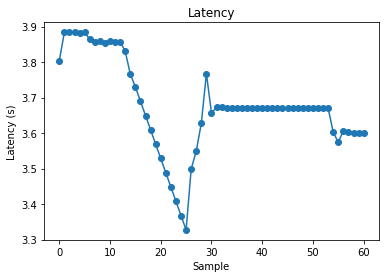

In [6]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Latency')
plt.xlabel('Sample')
plt.ylabel('Latency (s)')